### TensorFlow Tuturial on the MNIST Fahsion Dataset

This tutorial was taken from TensorFlow documentation website to learn the workings of the library. This example focuses on using Multi-Layer Perceptron Deep Learning model to classify clothing images to their respective labels.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.9.0-rc2


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
type(fashion_mnist)

module

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

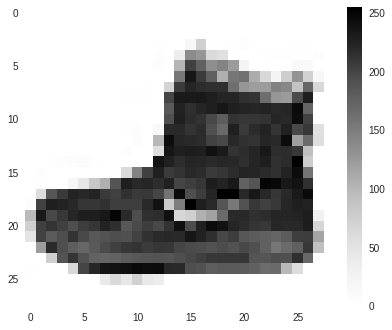

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [11]:
#The tutorial wants to scale the entries from 0 - 1 instead of 1 - 255. Try it later when its not scaled
train_images = train_images / 255.0

test_images = test_images / 255.0

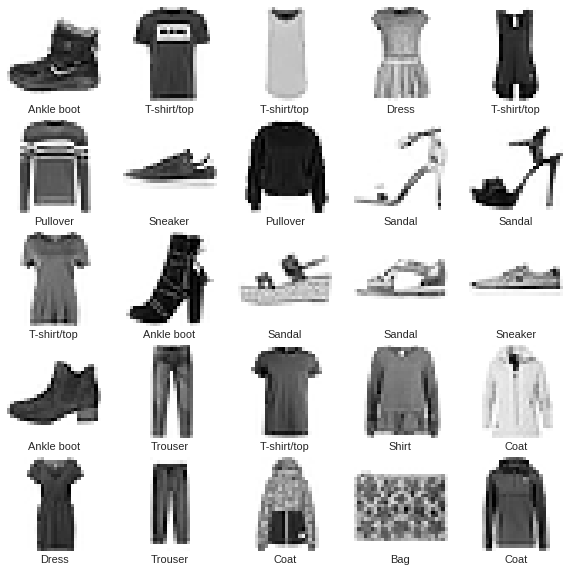

In [12]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i + 1)
  plt.imshow(train_images[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[train_labels[i]])

In [15]:
train_images[0].reshape(1,-1).shape

(1, 784)

In [16]:
#declare the NN model to be certain architecture
model = keras.Sequential()
#add in the number of layers and activation function used
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

#compiling the model after architecture is declared. Here we declare the optimizer, the type of loss function, and the metrics to evaluate the method
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
# one epoch is equivalent to training all the data and updating the weights one full round
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 10s 167us/step - loss: 0.5048 - acc: 0.8241
Epoch 2/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.3783 - acc: 0.8639
Epoch 3/5
56672/60000 [===========================>..] - ETA: 0s - loss: 0.3391 - acc: 0.875560000/60000 [==============================] - 9s 152us/step - loss: 0.3385 - acc: 0.8758
Epoch 4/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.3136 - acc: 0.8846
Epoch 5/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.2957 - acc: 0.8903


In [18]:
#evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy: ',test_acc)

10000/10000 [==============================] - 1s 57us/step
Test Accuracy:  0.8722


In [19]:
#using the model to make predictions
predictions =  model.predict(test_images)

In [20]:
predictions.shape

(10000, 10)

In [21]:
predictions[0], np.argmax(predictions[0])

(array([3.33379433e-07, 4.13865742e-08, 1.33255584e-09, 1.13783996e-10,
        2.26464181e-08, 2.34892331e-02, 1.43957422e-07, 1.31700560e-02,
        3.06223337e-05, 9.63309526e-01], dtype=float32), 9)

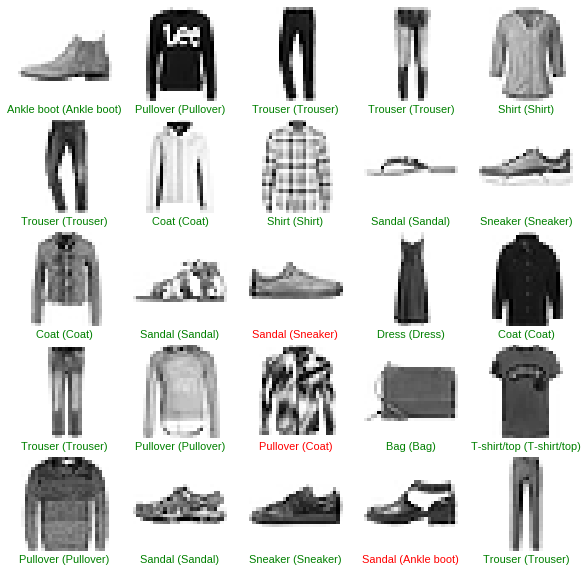

In [22]:
## plotting the first 25 test images, their predicted labels and true labels
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[i])
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

### Implementing the model without the Flatten layer

The following code is my own attempt to see that the Flatten Layer can be replaced by specifying the argument input_shape to the number of features each observation contains.

In [39]:
#reshaping the data to try to get rid of the flatten layer
train = np.empty([60000, 784])
for i in range(len(train_images)):
    train[i] = (train_images[i].reshape(1,-1))

In [40]:
#declare the NN model to be certain architecture
model = keras.Sequential()
#add in the number of layers and activation function used
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu, input_shape = (train.shape[1],) )) 
# this most likely does not work because each data point is a 2d matrix
#it will only work if i make the features 28*28 per row and then the train shape will work
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

#compiling the model after architecture is declared. Here we declare the optimizer, the type of loss function, and the metrics to evaluate the method
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [41]:
# one epoch is equivalent to training all the data and updating the weights one full round
model.fit(train, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.5048 - acc: 0.8237
Epoch 2/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.3776 - acc: 0.8644
Epoch 3/5
59904/60000 [============================>.] - ETA: 0s - loss: 0.3411 - acc: 0.875760000/60000 [==============================] - 9s 149us/step - loss: 0.3409 - acc: 0.8758
Epoch 4/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.3160 - acc: 0.8846
Epoch 5/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.2961 - acc: 0.8900


In [46]:
#changing the test data structure
test = np.empty([10000, 784])
for i in range(len(test_images)):
   test[i] = (test_images[i].reshape(1,-1))

#evaluating the model
test_loss, test_acc = model.evaluate(test, test_labels)
print('Test Accuracy: ',test_acc)

10000/10000 [==============================] - 0s 48us/step
Test Accuracy:  0.8746


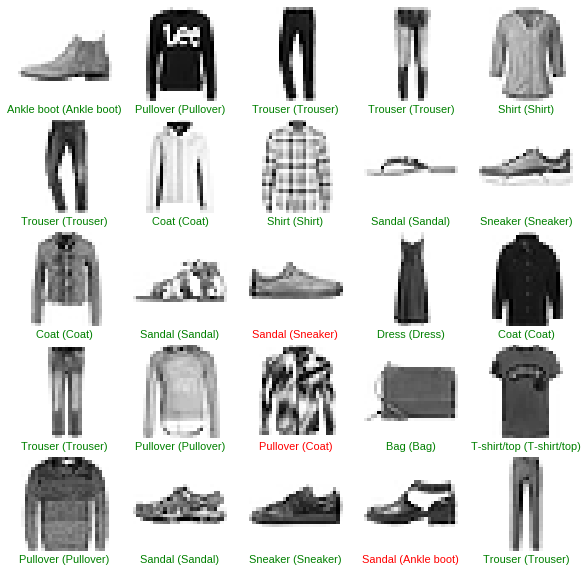

In [47]:
## plotting the first 25 test images, their predicted labels and true labels
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[i])
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)